# Geopandas and Python
--------------------
http://geopandas.org/
GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

How to install geopandas: http://geopandas.org/install.html#installing-geopandas

## Dependencies
Installation via conda should also install all dependencies, but a complete list is as follows:
* numpy - Fundamental package for scientific computing with Python http://www.numpy.org/
* pandas (version 0.15.2 or later) - High-performance, easy-to-use data structures and data analysis tools http://pandas.pydata.org/
* shapely - Python package for manipulation and analysis of planar geometric objects (based on widely deployed GEOS) https://pypi.python.org/pypi/Shapely
* fiona - Reading and writing spatial data (alternative for geopandas) https://pypi.python.org/pypi/Fiona/1.7.9.post1
* six - provides utility functions for compatiblity on both Python versions https://pypi.python.org/pypi/six
* pyproj - Performs cartographic transformations and geodetic computations https://pypi.python.org/pypi/pyproj

Further, optional dependencies are:
* geopy 0.99 (optional; for geocoding) -  Geocoding library: coordinates to address <-> address to coordinates. https://pypi.python.org/pypi/geopy/0.99
* psycopg2 (optional; for PostGIS connection) https://pypi.python.org/pypi/psycopg2
* rtree (optional; spatial index to improve performance) https://pypi.python.org/pypi/Rtree/

## Plotting Packages
* matplotlib - 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments https://matplotlib.org/
* descartes - Use geometric objects as matplotlib paths and patches https://pypi.python.org/pypi/descartes
* pysal - library of spatial analysis functions to support the development of high level applications http://pysal.readthedocs.io/en/latest/
* shapely - manipulation of geometrict shapes https://pypi.python.org/pypi/Shapely
* bokeh - interactive mapping https://bokeh.pydata.org/en/latest/

There was one absolutely amazing site with lessons from the University of Helsinki on GeoPandas, much of which was adopted and modified for this notebook.  Take a look at https://automating-gis-processes.github.io/2016/index.html for a more detailed walk through.

In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

Importing Shapefiles
---------------
Shapefiles are a common Geographic Information System (GIS) file type used throughout the industry. Shapefiles are technically made of several files.

Mandatory files 
* .shp — shape format; the feature geometry itself
* .shx — shape index format; a positional index of the feature geometry to allow seeking forwards and backwards quickly
* .dbf — attribute format; columnar attributes for each shape, in dBase IV format

To import a shapefile you can use the following:

In [2]:
pntHistMark = gpd.read_file('VT_Roadside_Historic_Markers.shp')

Because shapefiles can be large, downloads are usually zipped up. In order to conserve space and not have all those subfiles showing up, you can actually import it directly from a zip. VFS stands for Virtual File System which is an abstraction layer on top of a more concrete file system. The purpose of a VFS is to allow client applications to access different types of concrete file systems in a uniform way.

In [3]:
vctCntyBound = gpd.read_file('/VT_Boundaries__RPC_polygons.shp', vfs='zip://VT_Boundaries__RPC_polygons.zip')

Saving a File
-------
Like in Pandas, it is not hard to save to a shapefile.  Adjust the name and location to best fit your case and see what happens.

In [4]:
# Select first 50 rows
selection = pntHistMark[0:50]

# Write those rows into a new Shapefile
#Change the filename to the correct path, unlik the read_file my Windows computer required the complete path
selection.to_file(driver='ESRI Shapefile',filename=r'C:/Users/kendall.fortney/Desktop/PythonGIS/VTHistoric_Markers_Redone.shp')

## Pandas

Like Pandas, Geopandas contains all the functionality that can be applied to non-GIS dataframes. Most of the functions used in Numpy and Pandas can be applied here to non-geometry columns

In [5]:
vctCntyBound.head(3)

,OBJECTID,RPC,INITIALS,SHORTNAME,LONGNAME,ShapeSTAre,ShapeSTLen,geometry
0,1,CC,CCRPC,Chittenden County RPC,Chittenden County Regional Planning Commission,1.609237e+09,201814.709240,"POLYGON ((452203.9672731007 241948.2255608736,..."
1,2,SW,SWCRPC,Southern Windsor County RPC,Southern Windsor County Regional Planning Comm...,8.908414e+08,128848.691548,"POLYGON ((497499.9973051278 114802.4954725726,..."
2,3,BC,BCRC,Bennington County RC,Bennington County Regional Commission,1.488553e+09,203533.897896,"POLYGON ((451638.0272736274 89835.76545525473,..."


In [6]:
pntHistMark.head(3)

,OBJECTID,name,descriptio,website,town,county,address,video_url,coordinate,coordina_1,Organizati,YearCast,FiscalYear,geometry
0,1,"""Snowflake"" Bentley -- Jericho's world famous ...","For fifty years Wilson A. Bentley, a farmer an...",None,Jericho,CHITTENDEN,"Jericho Center Cir., in village",None,-72.973052,44.469608,Vermont Division for Historic Preservation,2003,2016.0,POINT (-72.97305209009137 44.46960766018835)
1,2,"""Vermont's First College""","On this site Castleton State College, Vermonts...",None,Castleton,RUTLAND,VT Route 4A in front of the town library,None,-73.178299,43.611718,Vermont Division for Historic Preservation,1986,NaN,POINT (-73.17829915991881 43.61171830002038)
2,3,1st Normal School -- Pioneer in Teacher Training,The first recognized school in America for the...,None,Concord,ESSEX,"U.S. Route 2, at Shadow Lake Road",None,-71.889163,44.428617,Vermont Historic Sites Commission,1954,NaN,POINT (-71.88916283008687 44.42861686006097)


In [7]:
# A quick way to get a count of Nulls in the data
pntHistMark.isnull().sum()

OBJECTID        0
name            0
descriptio      0
website       236
town            0
county          0
address         2
video_url     189
coordinate      2
coordina_1      2
Organizati      0
YearCast        0
FiscalYear    197
geometry        0
dtype: int64

In [8]:
# Or create counts or other mathmatical functions like in this case a count of new Roadside Marks by year
yeargroup = pntHistMark[['name', 'YearCast']].groupby(['YearCast'], as_index=False).count().sort_values(by='YearCast',ascending=0)

# View of abbreviated list
yeargroup.head(15)

,YearCast,name
45,2017,2
44,2016,14
43,2015,12
42,2014,3
41,2013,10
40,2012,12
39,2011,10
38,2010,4
37,2009,1
36,2008,7


In [9]:
pntHistMark.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 14 columns):
OBJECTID      236 non-null int64
name          236 non-null object
descriptio    236 non-null object
website       0 non-null object
town          236 non-null object
county        236 non-null object
address       234 non-null object
video_url     47 non-null object
coordinate    234 non-null float64
coordina_1    234 non-null float64
Organizati    236 non-null object
YearCast      236 non-null int64
FiscalYear    39 non-null float64
geometry      236 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 25.9+ KB


In [10]:
# The mathmatical function in Pandas still apply here
print(pntHistMark.YearCast.mean())
print(pntHistMark.YearCast.median())

1991.6101694915253
2002.0


Plotting
-----------------
First a quick plot of what is in both of these shape files, one is a series of lines, and the other is a set of polygon vectors. Shapely holds the power to create a variety of points, lines and polygons

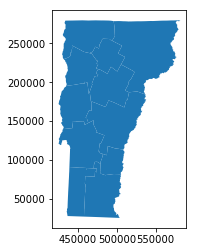

In [11]:
vctCntyBound.plot()
plt.show()

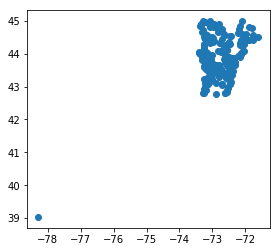

In [12]:
pntHistMark.plot()
plt.show()

Interestingly this quickly showed an outlier in the historical marker data. In that dataset there is both coordinates and the geometry so it may be useful to use one to correct the other. Most shapefiles will only have the geometry.

Coordinate Reference System (crs)
-----------------
Each geospatial dataset should have a coordinate system which allow you to know what datum was used. Datums are a frame of reference that relate to mathmatical models of the Earth. Knowing if two datasets are in using the same datum can be the difference between everything lining up or everything completetly off.

For a fill list that can be use to decode the CRS, take a look here:http://spatialreference.org/ref/epsg/

In [13]:
# current coordinate reference system
pntHistMark.crs

{'init': 'epsg:4326'}

## Coordinate Transformation

Sometime a CRS needs to be assigned or be changed.  Here is a simple way to do just that that, the transformation of the points happen automatically.

In [14]:
#create a new dataset to modify
newdata = pntHistMark

from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4327)

# verify crs definition change
newdata.crs

{'init': 'epsg:4327', 'no_defs': True}

Table joins
---------------------
Table joins are something that is done in data science in general and the same methods used in Pandas can be applied here. In this case the two datasets don't have a common index so in this example I am going to merge based on the OBJECTID but ideally this would be a more relevant field.

In [15]:
join = pntHistMark.merge(vctCntyBound, on='OBJECTID')
join.head(5)

,OBJECTID,name,descriptio,website,town,county,address,video_url,coordinate,coordina_1,...,YearCast,FiscalYear,geometry_x,RPC,INITIALS,SHORTNAME,LONGNAME,ShapeSTAre,ShapeSTLen,geometry_y
0,1,"""Snowflake"" Bentley -- Jericho's world famous ...","For fifty years Wilson A. Bentley, a farmer an...",None,Jericho,CHITTENDEN,"Jericho Center Cir., in village",None,-72.973052,44.469608,...,2003,2016.0,POINT (-72.97305209009137 44.46960766018835),CC,CCRPC,Chittenden County RPC,Chittenden County Regional Planning Commission,1.609237e+09,201814.709240,"POLYGON ((452203.9672731007 241948.2255608736,..."
1,2,"""Vermont's First College""","On this site Castleton State College, Vermonts...",None,Castleton,RUTLAND,VT Route 4A in front of the town library,None,-73.178299,43.611718,...,1986,NaN,POINT (-73.17829915991881 43.61171830002038),SW,SWCRPC,Southern Windsor County RPC,Southern Windsor County Regional Planning Comm...,8.908414e+08,128848.691548,"POLYGON ((497499.9973051278 114802.4954725726,..."
2,3,1st Normal School -- Pioneer in Teacher Training,The first recognized school in America for the...,None,Concord,ESSEX,"U.S. Route 2, at Shadow Lake Road",None,-71.889163,44.428617,...,1954,NaN,POINT (-71.88916283008687 44.42861686006097),BC,BCRC,Bennington County RC,Bennington County Regional Commission,1.488553e+09,203533.897896,"POLYGON ((451638.0272736274 89835.76545525473,..."
3,4,2nd Vermont Volunteer Infantry Regiment,"On June 24, 1861, the first Vermont soldiers w...",None,Burlington,CHITTENDEN,North Avenue in Battery Park,None,-73.220763,44.481325,...,2011,NaN,POINT (-73.22076252968733 44.48132500982513),NW,NWRPC,Northwest RPC,Northwest Regional Planning Commission,2.285635e+09,242793.916924,"POLYGON ((460860.0944790148 279521.6205874127,..."
4,5,A.W.Gray & Sons,Near this site Albert W. Gray manufactured his...,None,Middletown Springs,RUTLAND,Route 133A and Montvert Rd.,None,-73.118337,43.482350,...,1998,NaN,POINT (-73.11833662009371 43.482349910201),LC,LCPC,Lamoille County PC,Lamoille County Planning Commission,1.207382e+09,166207.247550,"POLYGON ((491679.967300891 254475.715569835, 4..."


## Point in Polygon & Intersect

Often GIS will have a mx of points, lines and shapes. Determining if a point, i.e. a road marker, is within a shape, i.e. town boundries, can be quite useful and there are some built in functions in Shapely to do just that. Performing a spatial join (this will be a seperate notebook) between two spatial datasets is one of the most typical applications where Point in Polygon (PIP) query is used

There are basically two ways of conducting PIP in Shapely:
* using a function called .within() that checks if a point is within a polygon
* using a function called .contains() that checks if a polygon contains a point


In [16]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [17]:
# Is p1 in the polygon
print(p1.within(poly))
# Is p1 in the polygon
print(p2.within(poly))

True
False


In [18]:
# Does polygon contain p1?
print(poly.contains(p1))
# Does polygon contain p2?
print(poly.contains(p2))

True
False


## Intersect

Another typical geospatial operation is to see if a geometry intersect or touches another one. The difference between these two is that:
* if objects intersect, the boundary and interior of an object needs to intersect in any way with those of the other.
* if an object touches the other one, it is only necessary to have (at least) a single point of their boundaries in common but their interiors shoud NOT intersect.

In [19]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [20]:
line_a.intersects(line_b)

True

In [21]:
line_a.touches(line_b)

True

In [22]:
# Does the line intersect with itself?
line_a.intersects(line_a)

True

## Summary

This is just an introduction to Geopandas, there are a lot of applications and libraries that can be explored. I again will strongly recommend this link for a more comprehensive walkthrough: https://automating-gis-processes.github.io/2016/Lesson1-Intro-Python-GIS.html. The power in using Python and R is the scalability with large datasets and by their nature, most of GIS is made of big data. Explore and share!